<a href="https://colab.research.google.com/github/shreya3134/deep_learning/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

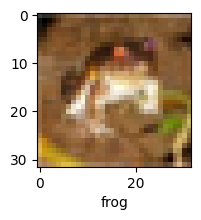

In [14]:
plot_sample(X_train,y_train,0)

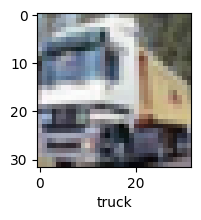

In [15]:
plot_sample(X_train,y_train,1)

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0

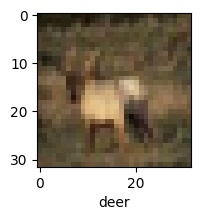

In [18]:
plot_sample(X_train,y_train,3)

In [22]:
ann=models.Sequential([
                       layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation="relu"),
                       layers.Dense(1000,activation="relu"),
                       layers.Dense(1000,activation="sigmoid")
])
ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 173s 110ms/step - accuracy: 0.2536 - loss: 2.2186
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 233s 130ms/step - accuracy: 0.3954 - loss: 1.7080
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 242s 117ms/step - accuracy: 0.4302 - loss: 1.6114
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.4589 - loss: 1.5255
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 115ms/step - accuracy: 0.4796 - loss: 1.4779


In [24]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.4108 - loss: 1.6356


[1.6357473134994507, 0.41130000352859497]

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report : \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.39      0.62      0.48      1000
           1       0.34      0.80      0.47      1000
           2       0.35      0.12      0.18      1000
           3       0.38      0.17      0.23      1000
           4       0.27      0.66      0.38      1000
           5       0.42      0.10      0.15      1000
           6       0.61      0.19      0.29      1000
           7       0.48      0.51      0.50      1000
           8       0.49      0.53      0.51      1000
           9       0.68      0.09      0.16      1000

    accuracy                           0.38     10000
   macro avg       0.44      0.38      0.34     10000
weighted avg       0.44      0.38      0.34     10000



CNN

In [23]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=3,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=6,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [27]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2824 - loss: 1.9582
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.4376 - loss: 1.5880
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.4696 - loss: 1.4863
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.4947 - loss: 1.4223
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5145 - loss: 1.3720


In [29]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.4604198e-02, 2.1630995e-02, 4.3714724e-02, 4.8429433e-01,
        4.1423187e-02, 1.9476096e-01, 4.7516979e-02, 3.8028061e-02,
        8.9524932e-02, 2.4501681e-02],
       [8.7130196e-02, 1.0920490e-01, 7.5947674e-04, 2.0337031e-04,
        3.5378887e-04, 3.5200130e-05, 6.5393979e-06, 5.5832243e-05,
        7.6413262e-01, 3.8118146e-02],
       [1.7144363e-01, 3.7292853e-01, 2.7878801e-03, 2.4729879e-03,
        1.3425631e-03, 1.2319722e-03, 4.3607699e-05, 5.5633474e-04,
        3.4409684e-01, 1.0309562e-01],
       [7.9092258e-01, 4.5764567e-03, 1.3040605e-02, 2.6557333e-04,
        7.3345536e-03, 4.3525204e-05, 3.0526706e-05, 1.4888265e-04,
        1.8203531e-01, 1.6019245e-03],
       [2.3454232e-03, 9.5680484e-04, 1.0317870e-01, 8.9722246e-02,
        5.3799701e-01, 5.7505321e-02, 1.9340248e-01, 1.3394052e-02,
        1.0215695e-03, 4.7635194e-04]], dtype=float32)

In [30]:
np.argmax(y_pred[0])

3

In [31]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [32]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

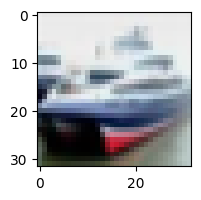

In [33]:
plot_sample(X_test,y_test,1)

In [37]:
classes[y_classes[1]]

'ship'

In [38]:
print("Classification Report",classification_report(y_test,y_classes))

Classification Report               precision    recall  f1-score   support

           0       0.59      0.56      0.57      1000
           1       0.63      0.63      0.63      1000
           2       0.50      0.28      0.36      1000
           3       0.40      0.23      0.29      1000
           4       0.39      0.47      0.43      1000
           5       0.44      0.51      0.47      1000
           6       0.48      0.69      0.56      1000
           7       0.65      0.50      0.57      1000
           8       0.55      0.73      0.62      1000
           9       0.54      0.55      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

